# Filtrado de la voz

## Importación de bibliotecas

In [1]:
import IPython
import soundfile as sf
import matplotlib.pyplot as plt
import numpy as np
import librosa.util
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

In [2]:
plt.style.use('fivethirtyeight')

## Reproducción del audio  original

In [15]:
url = "D:\\drive\\GitHub\\AudioDetectDepression\\data\\audio\\store\\101_26_6f3ad8b6.wav"
audio, rate = sf.read(url)
IPython.display.Audio(data=audio, rate=rate)

## Impresión  de la señal de audio  original

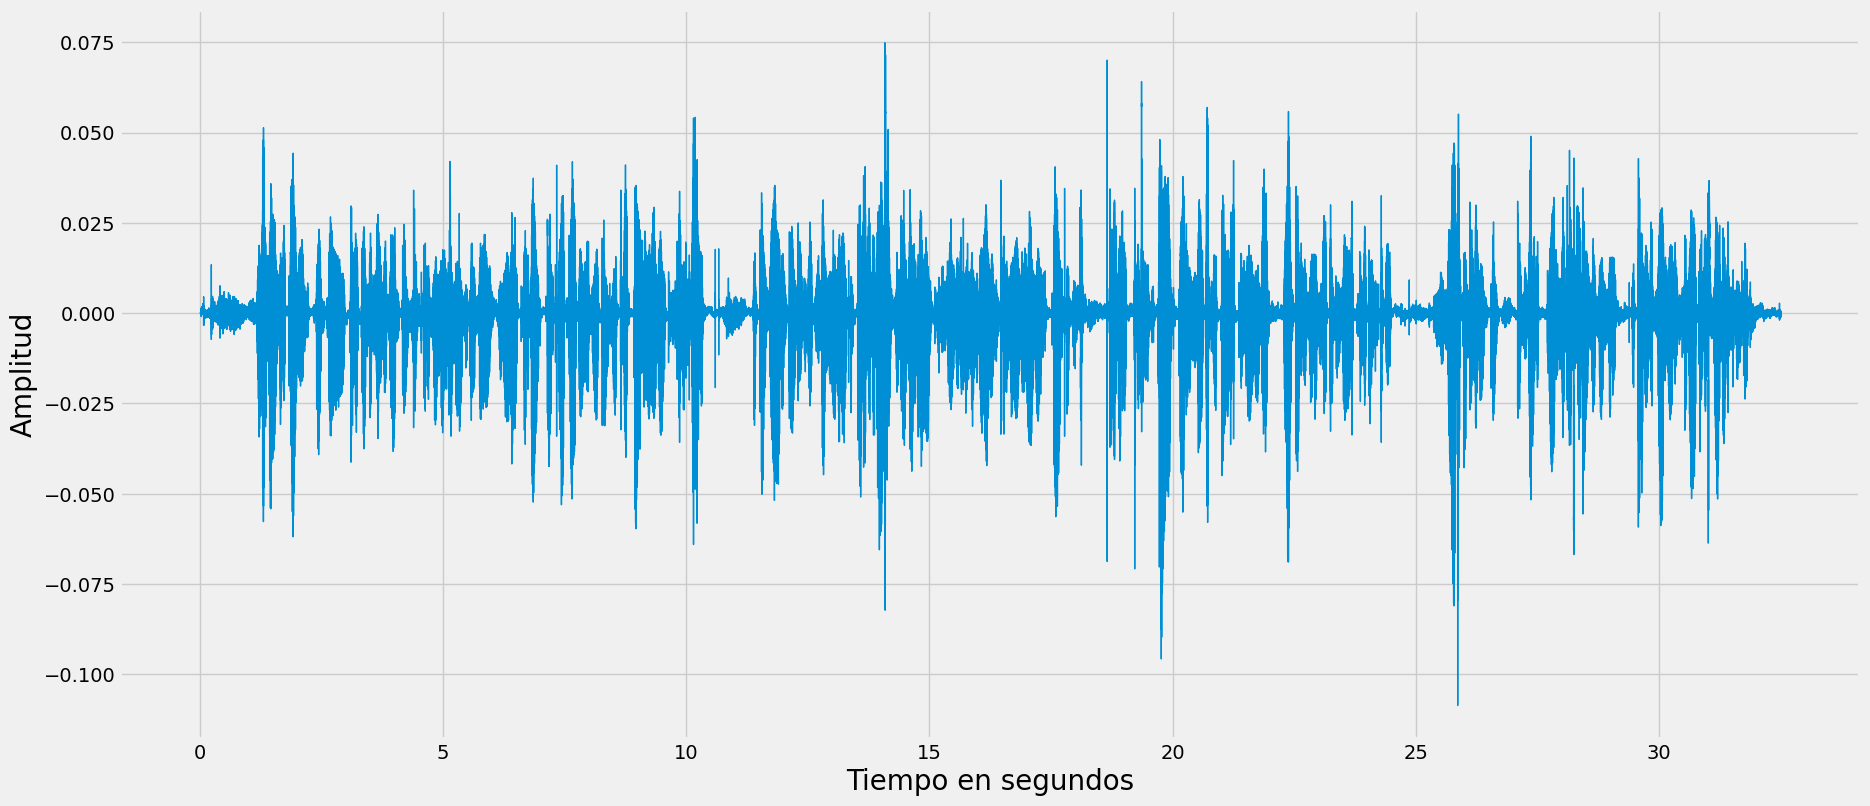

In [16]:
fig, ax = plt.subplots(figsize=(20, 9))
ax.set_xlabel('Tiempo en segundos', fontsize=20)
ax.set_ylabel('Amplitud', fontsize=20)
# plt.yticks(fontsize=12)
# plt.xticks(fontsize=17)
ax.plot([x /rate  for  x in range(audio.shape[0])], audio, lw=1)
plt.savefig("voiceFiltering/audioOriginal2.png")

## Parámetros de configuración
- Con la configuración predeterminada se obtienen muy buenos resultados.
- Se permite la modificación de los  parámetros con el fin de que pueda ser modificable en casos  muy particulares

La definición de los parámetros  es  la siguiente:

- **top_db**  es el parámetro de  la bioblioteca librosa, la cual es la que se necesita  hacer  dinámico. Se  usa el valor  de 30 como límite de decibeles que  pudiera alcanzar  la  vos  humana
- **data** es la señal de audio que se  quiere modificar
- **confidence** es el área que va a ocupar el área bajo la curva,  se puede considerar como elmargen de error de  posiblemente  seguir  teniendo ruido
- **auc** es el resultado del área bajo la curva, en cada  iteración  se acerca más a  **confidence**
- **exponencial** este parámetro permite otorgar una curva mucho más pronunciada mientras  más alto sea, ya que castiga los  valores  que  no sean iguales a 1. De preferencia dejarlo en  su  configuración predeterminada

In [17]:
top_db = 30
data= audio
confidence = .956
auc = 0

## Ejecución de la función para el  filtrado del audio
- Se imprime la curva con los datos  absolutos normalizados ordenados
- Se imprime la señal modificada (ruido sustituido  por  silencio)
- Se imprime el área bajo la curva usando la regla trapezoidal  compuesta
- Se imprime el tope de decibeles  usado para el filtrado actual

Cuando alcanza la probablidad de confianza  deseada:

- Se imprime el  audio con la señal  modificada y  ya recortado

Es posible  mantener la señal modificada  con  silencio, pero para  fines de la tesis, se puede omitir este paso para evitar  almacenar más  información

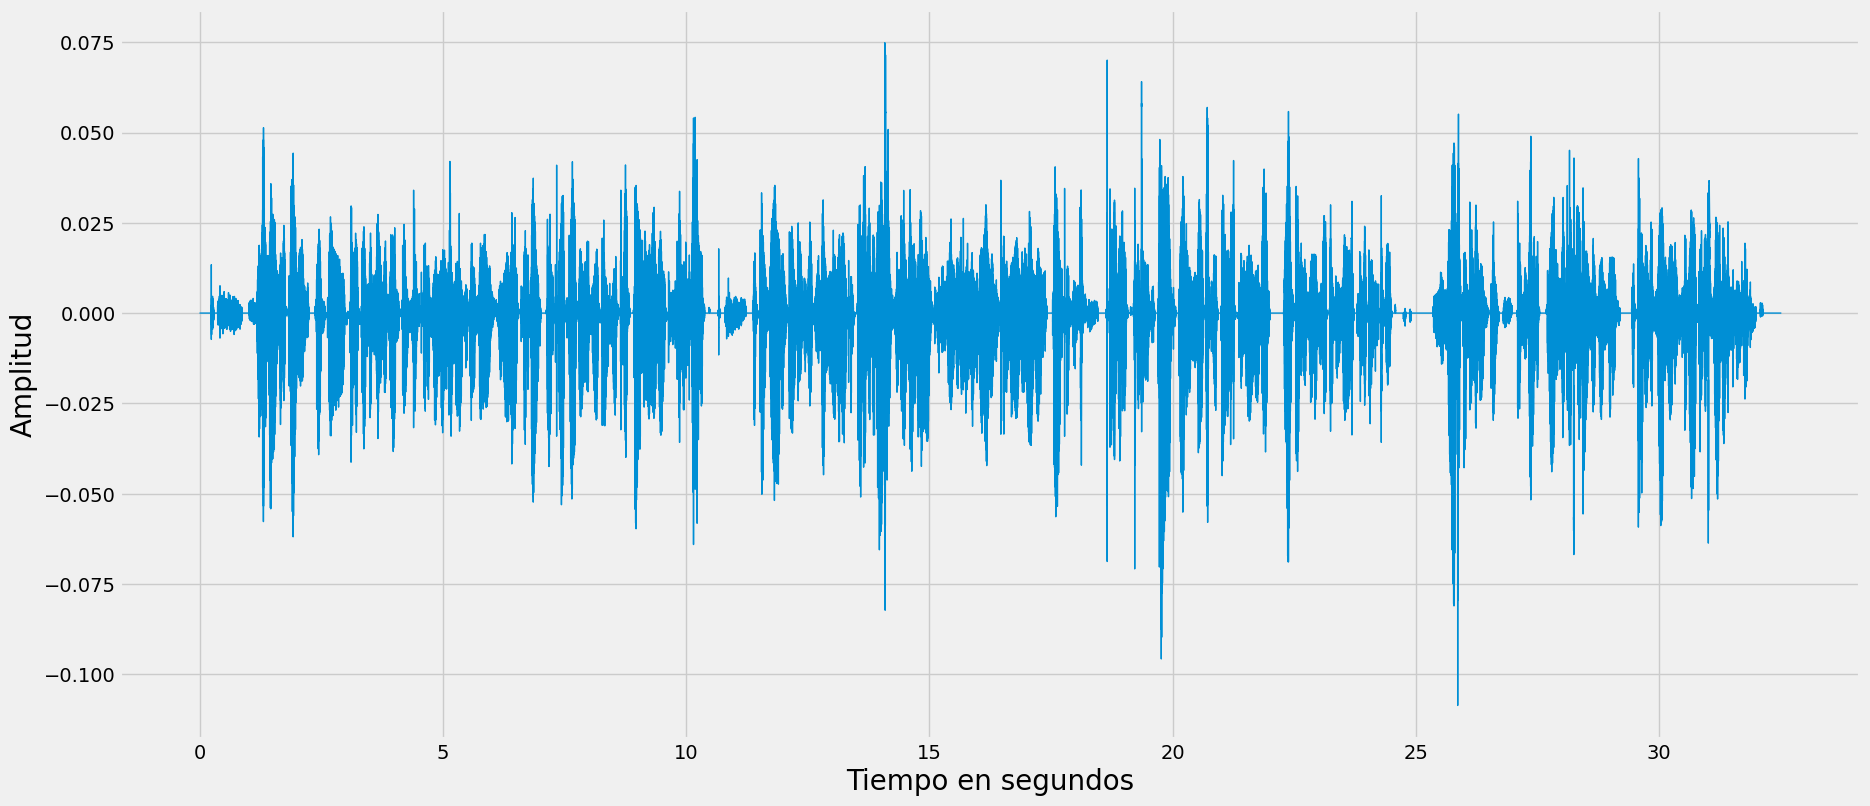

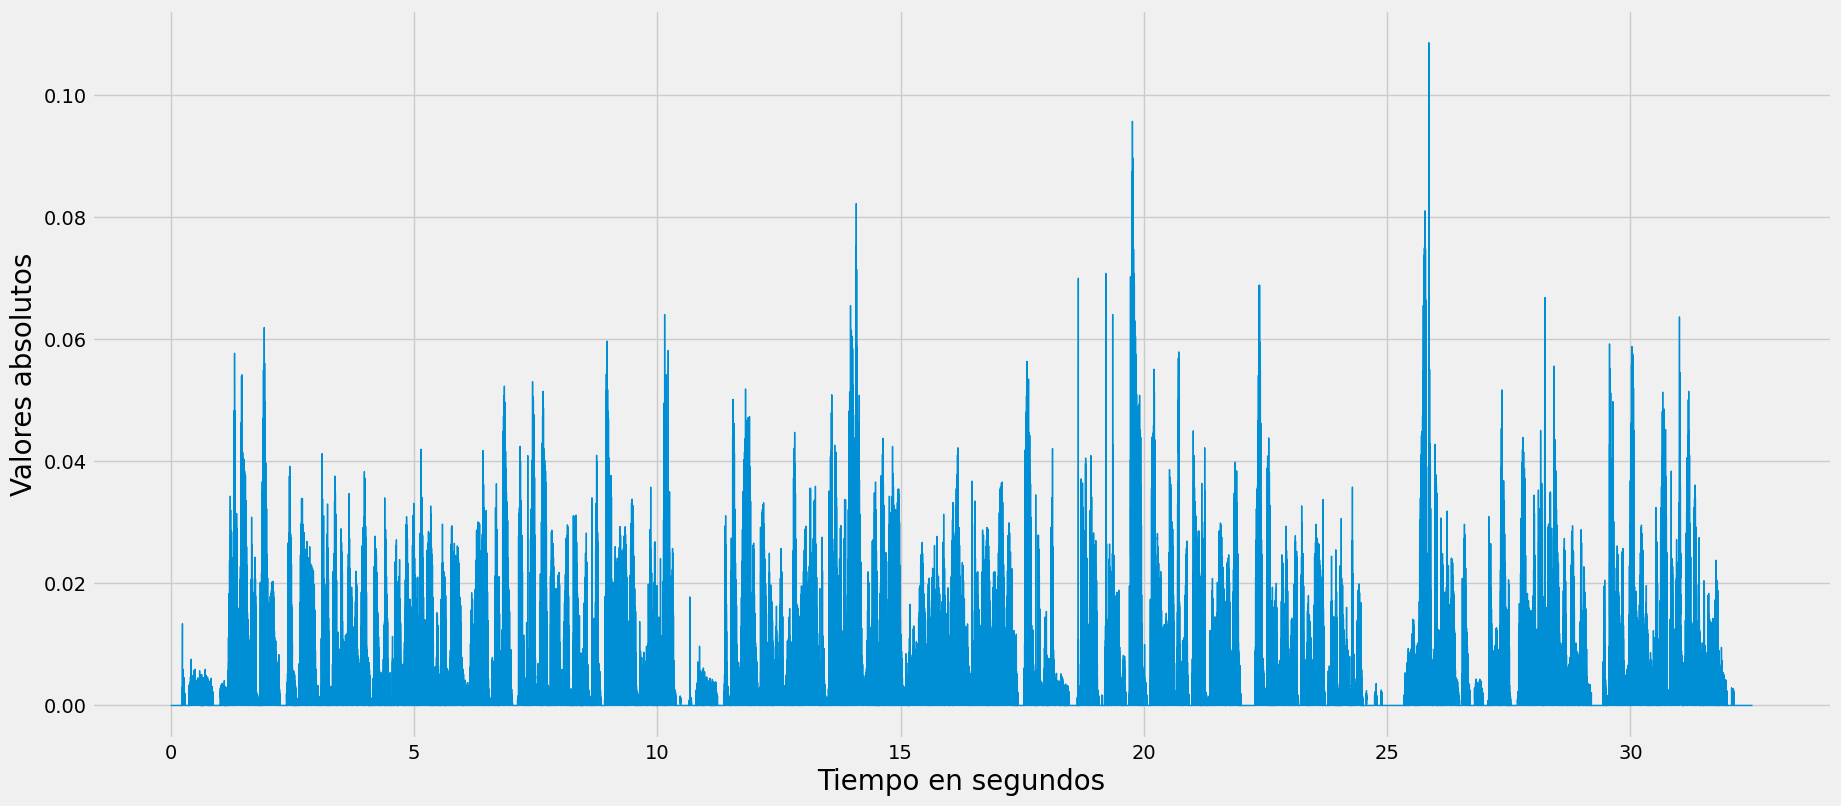

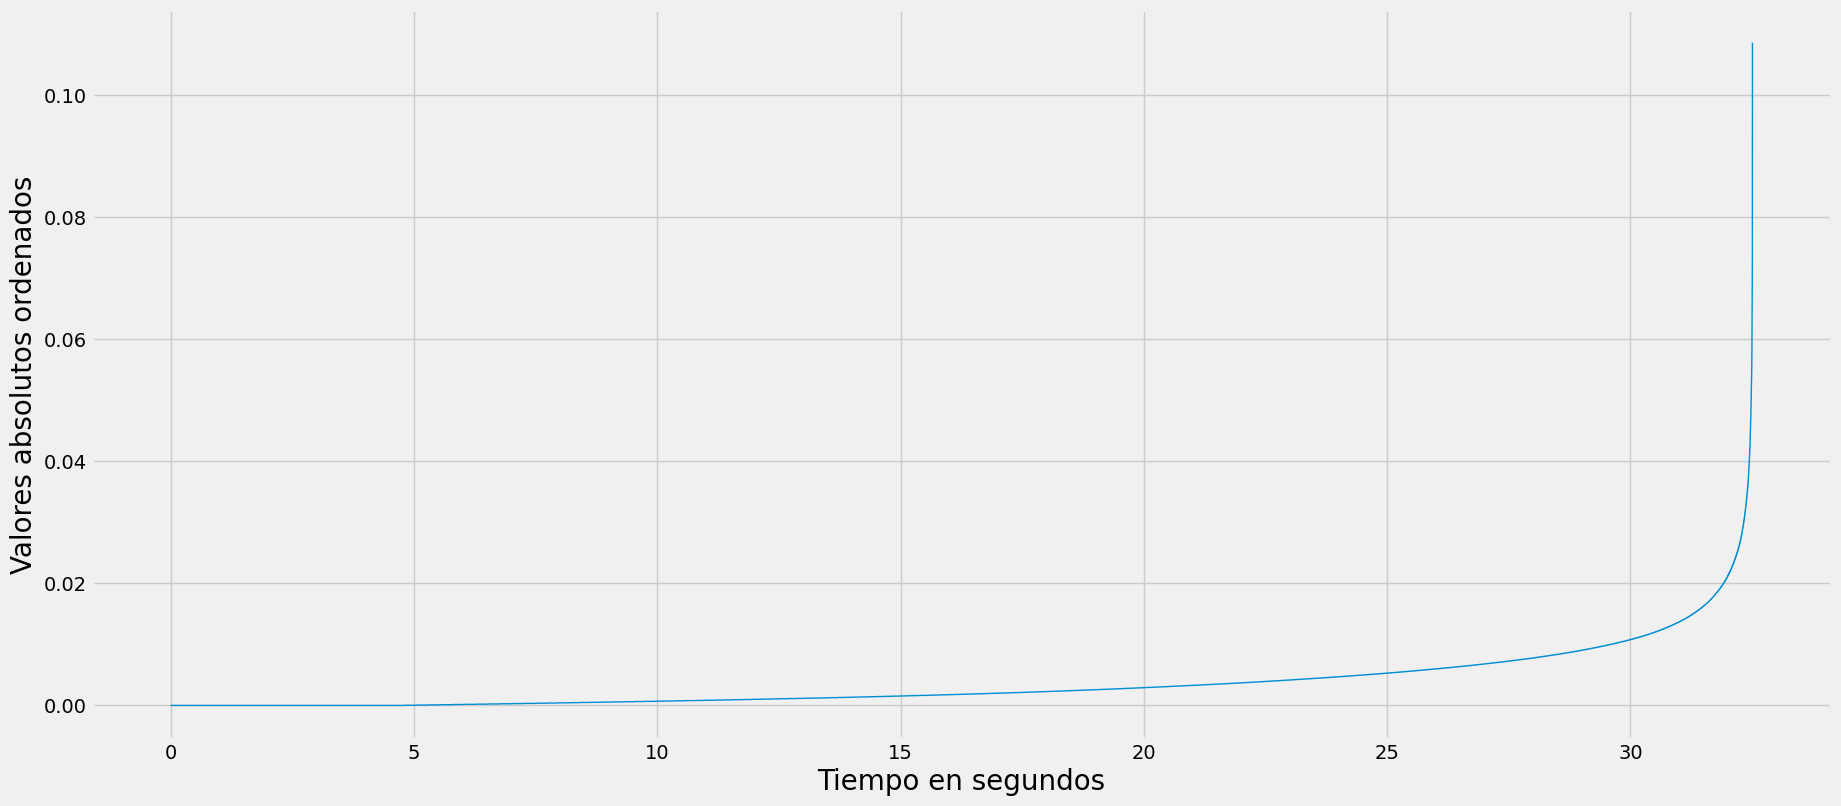

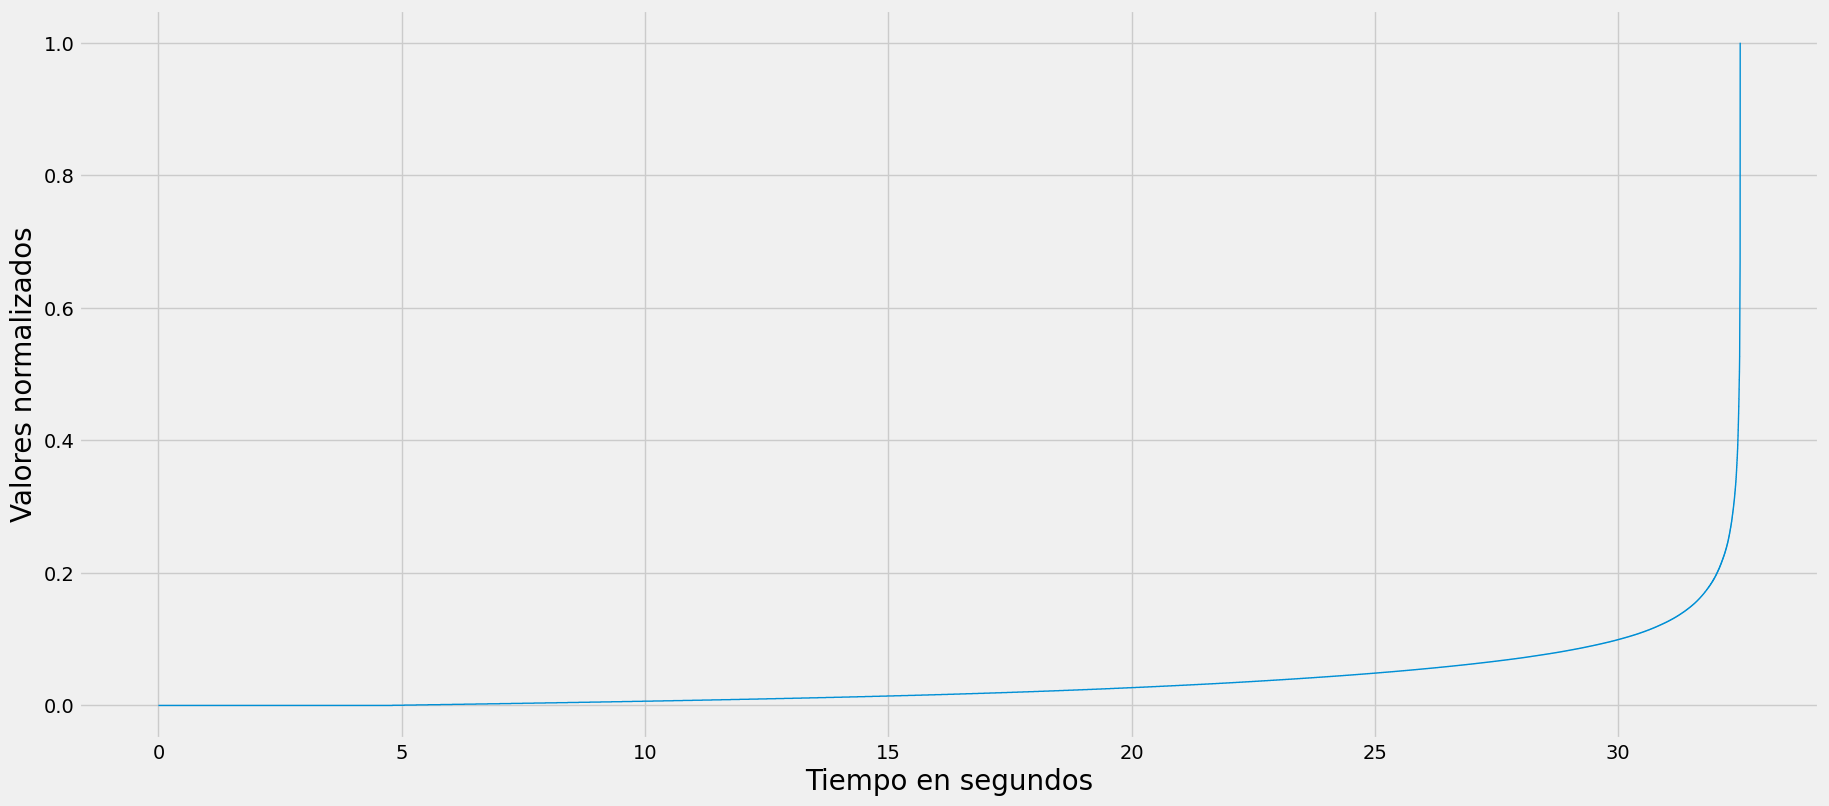

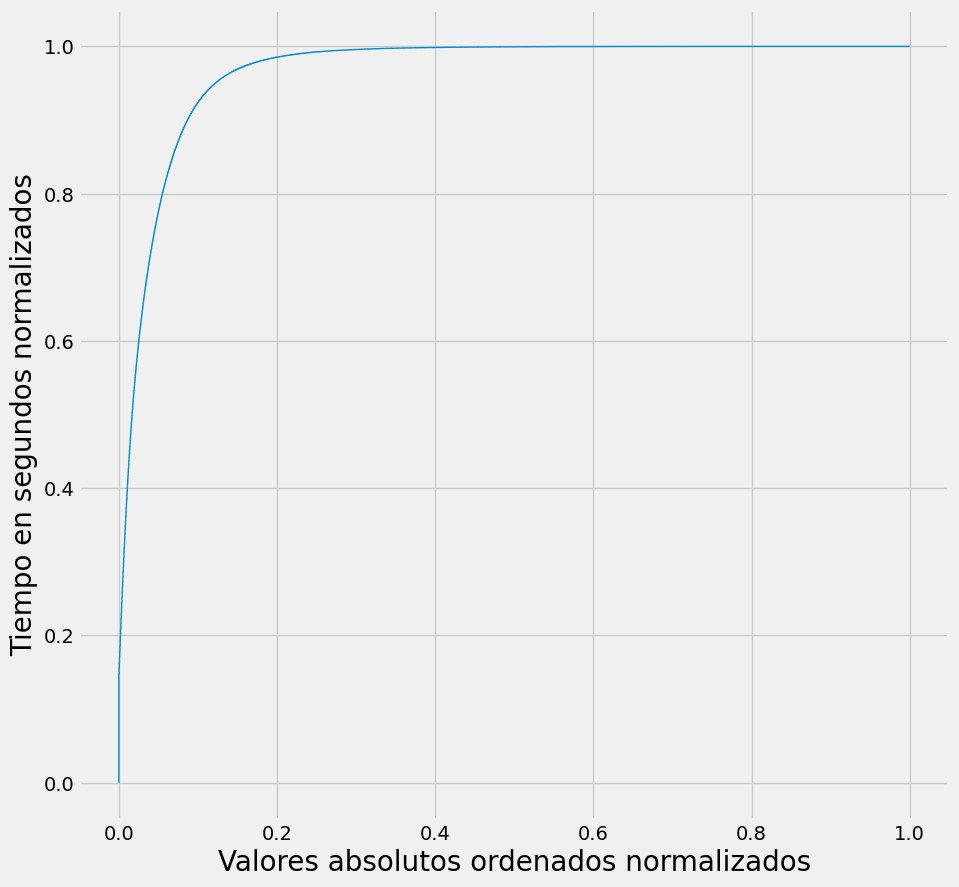

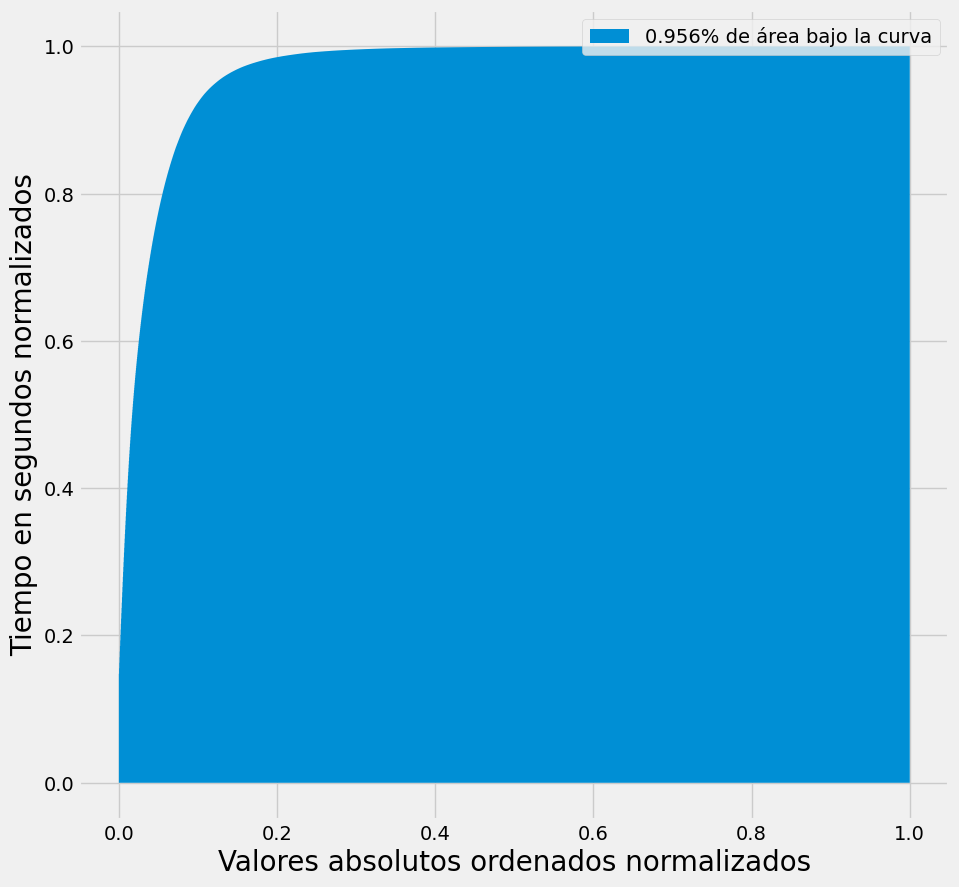

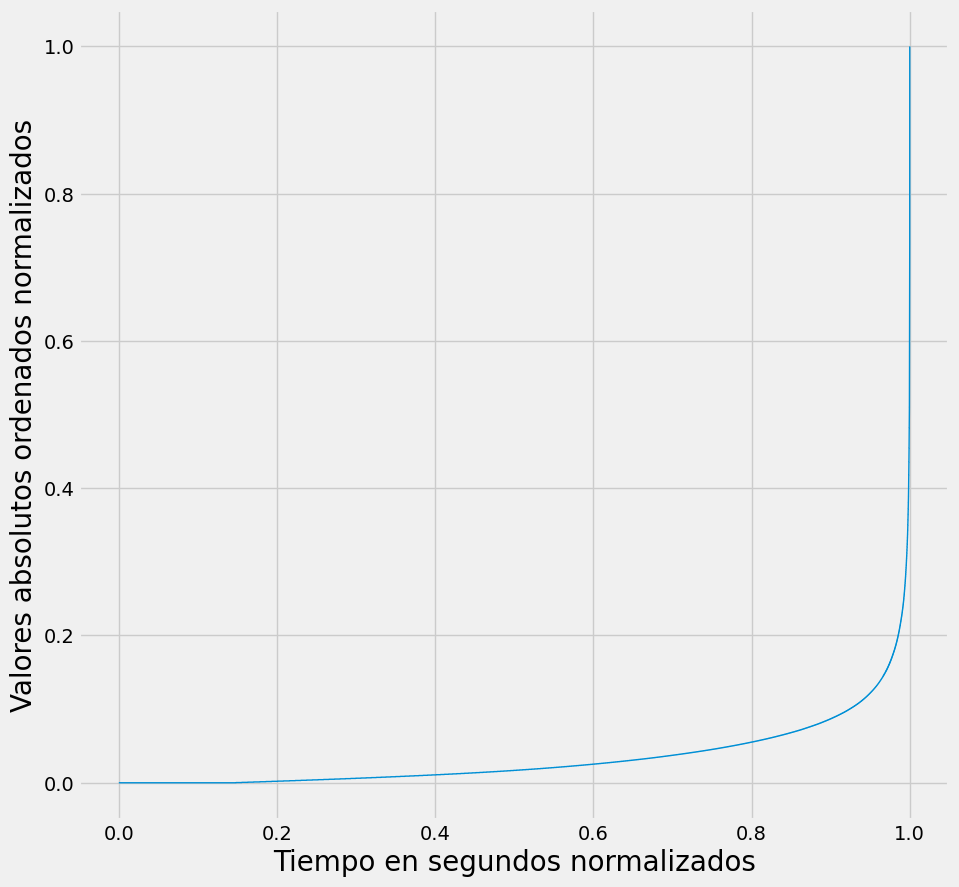

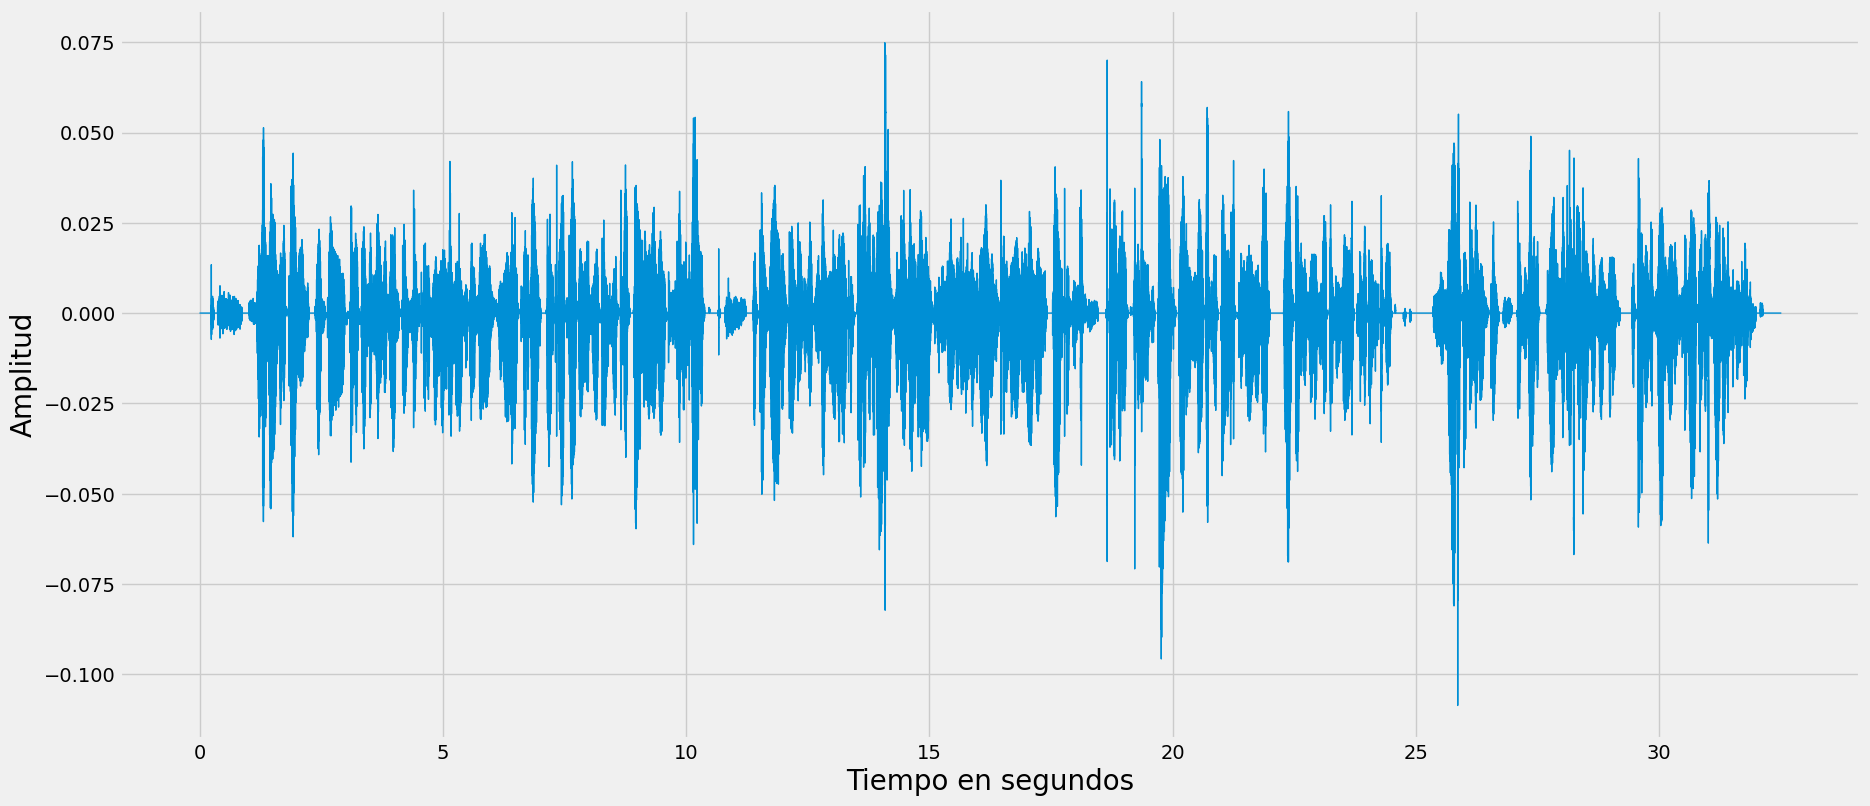

0.9661254809152398
30
0.956


In [18]:

while auc < confidence:
    cleanedAudio = np.zeros(data.shape)
    #Read the intervals to reassign the filtered values
    for start, end in librosa.effects.split(audio, top_db=top_db):
        cleanedAudio[start:end] = data[start:end]


    #Plotting the absolute  values
    fig, ax = plt.subplots(figsize=(20, 9))
    ax.set_xlabel('Tiempo en segundos', fontsize=20)
    ax.set_ylabel('Amplitud', fontsize=20)
    # plt.yticks(fontsize=12)
    # plt.xticks(fontsize=17)
    ax.plot([x /rate  for  x in range(cleanedAudio.shape[0])], cleanedAudio, lw=1)
    plt.savefig("voiceFiltering/firstIteration.png")
    plt.show()
    #Plotting the sorted absoulte values
    fig, ax = plt.subplots(figsize=(20, 9))
    ax.set_xlabel('Tiempo en segundos', fontsize=20)
    ax.set_ylabel('Valores absolutos', fontsize=20)
    # plt.yticks(fontsize=12)
    # plt.xticks(fontsize=17)
    ax.plot([x /rate for x in range(np.abs(cleanedAudio).shape[0])], np.abs(cleanedAudio), lw=1)
    plt.savefig("voiceFiltering/absoluteValues.png")
    plt.show()

    #Plotting  the sorted absolute values
    fig, ax = plt.subplots(figsize=(20, 9))
    ax.set_xlabel('Tiempo en segundos', fontsize=20)
    ax.set_ylabel('Valores absolutos ordenados', fontsize=20)

    # plt.yticks(fontsize=12)
    # plt.xticks(fontsize=17)
    ax.plot([x /rate for x in range(np.sort((np.abs(cleanedAudio))).shape[0])], np.sort((np.abs(cleanedAudio))),  lw=1)
    plt.savefig("voiceFiltering/sortedAbsoluteValues.png")
    plt.show()

    values  = MinMaxScaler().fit_transform(np.sort((np.abs(cleanedAudio))).reshape(-1,1))
    x_values = MinMaxScaler().fit_transform(np.array(range(0, len(values))).reshape(-1,1))

    fig, ax = plt.subplots(figsize=(20, 9))
    ax.set_xlabel('Tiempo en segundos', fontsize=20)
    ax.set_ylabel('Valores normalizados', fontsize=20)
    # plt.yticks(fontsize=12)
    # plt.xticks(fontsize=17)
    ax.plot([x /rate  for  x in range(values.shape[0])], values, lw=1)
    plt.savefig("voiceFiltering/normalizedSortedAbsoluteValues.png")
    plt.show()


    auc = np.trapz(np.ravel(x_values), np.ravel(values))
    if auc < confidence: top_db  = top_db-1
    #Plotting the curve
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.set_xlabel('Valores absolutos ordenados normalizados', fontsize=20)
    ax.set_ylabel('Tiempo en segundos normalizados', fontsize=20)
    # plt.yticks(fontsize=12)
    # plt.xticks(fontsize=17)
    plt.plot(values, x_values, lw=1)
    plt.savefig("voiceFiltering/areaUnderCurve.png")
    plt.show()

    fig, ax = plt.subplots(figsize=(10, 10))
    ax.set_xlabel('Valores absolutos ordenados normalizados', fontsize=20)
    ax.set_ylabel('Tiempo en segundos normalizados', fontsize=20)
    # plt.yticks(fontsize=12)
    # plt.xticks(fontsize=17)
    plt.fill_between(np.ravel(values), np.ravel(x_values), 0, label=f"{confidence}% de área bajo la curva")
    plt.legend()
    plt.savefig("voiceFiltering/areaUnderCurveFill.png")
    plt.show()

    fig, ax = plt.subplots(figsize=(10, 10))
    ax.set_xlabel('Tiempo en segundos normalizados', fontsize=20)
    ax.set_ylabel('Valores absolutos ordenados normalizados', fontsize=20)
    plt.plot(x_values, values, lw=1)
    plt.savefig("voiceFiltering/normalizedSortedAbsoluteTime.png")
    plt.show()
    #Plotting the audio signal
    fig, ax = plt.subplots(figsize=(20, 9))
    ax.set_xlabel('Tiempo en segundos', fontsize=20)
    ax.set_ylabel('Amplitud', fontsize=20)
    # plt.yticks(fontsize=12)
    # plt.xticks(fontsize=17)
    ax.plot([x /rate  for  x in range(cleanedAudio.shape[0])], cleanedAudio, lw=1)
    plt.show()
    print(auc)
    print(top_db)
    # This break is only to generate the necessarry  images  for the document
    break
print(confidence)
IPython.display.Audio(data=cleanedAudio[cleanedAudio != 0], rate=rate)

In [19]:
IPython.display.Audio(data=cleanedAudio[cleanedAudio != 0] [0:44100*2] , rate=rate)

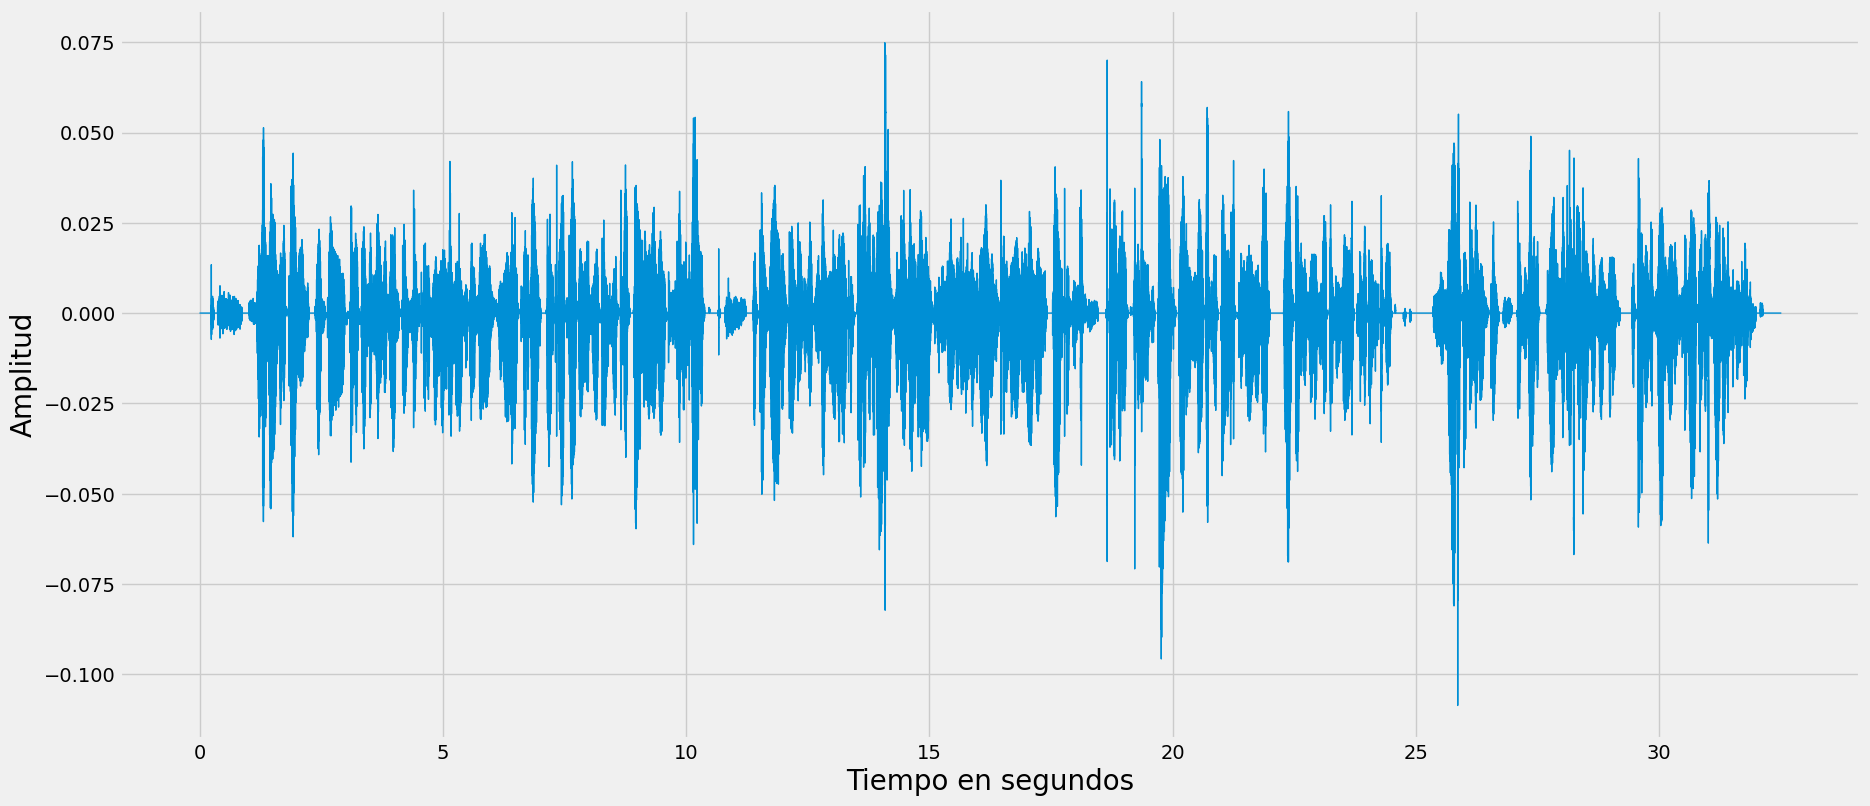

In [20]:
fig, ax = plt.subplots(figsize=(20, 9))
ax.set_xlabel('Tiempo en segundos', fontsize=20)
ax.set_ylabel('Amplitud', fontsize=20)
# plt.yticks(fontsize=12)
# plt.xticks(fontsize=17)
ax.plot([x /rate  for  x in range(cleanedAudio.shape[0])], cleanedAudio, lw=1)
plt.savefig("voiceFiltering/filteredAudio.png")

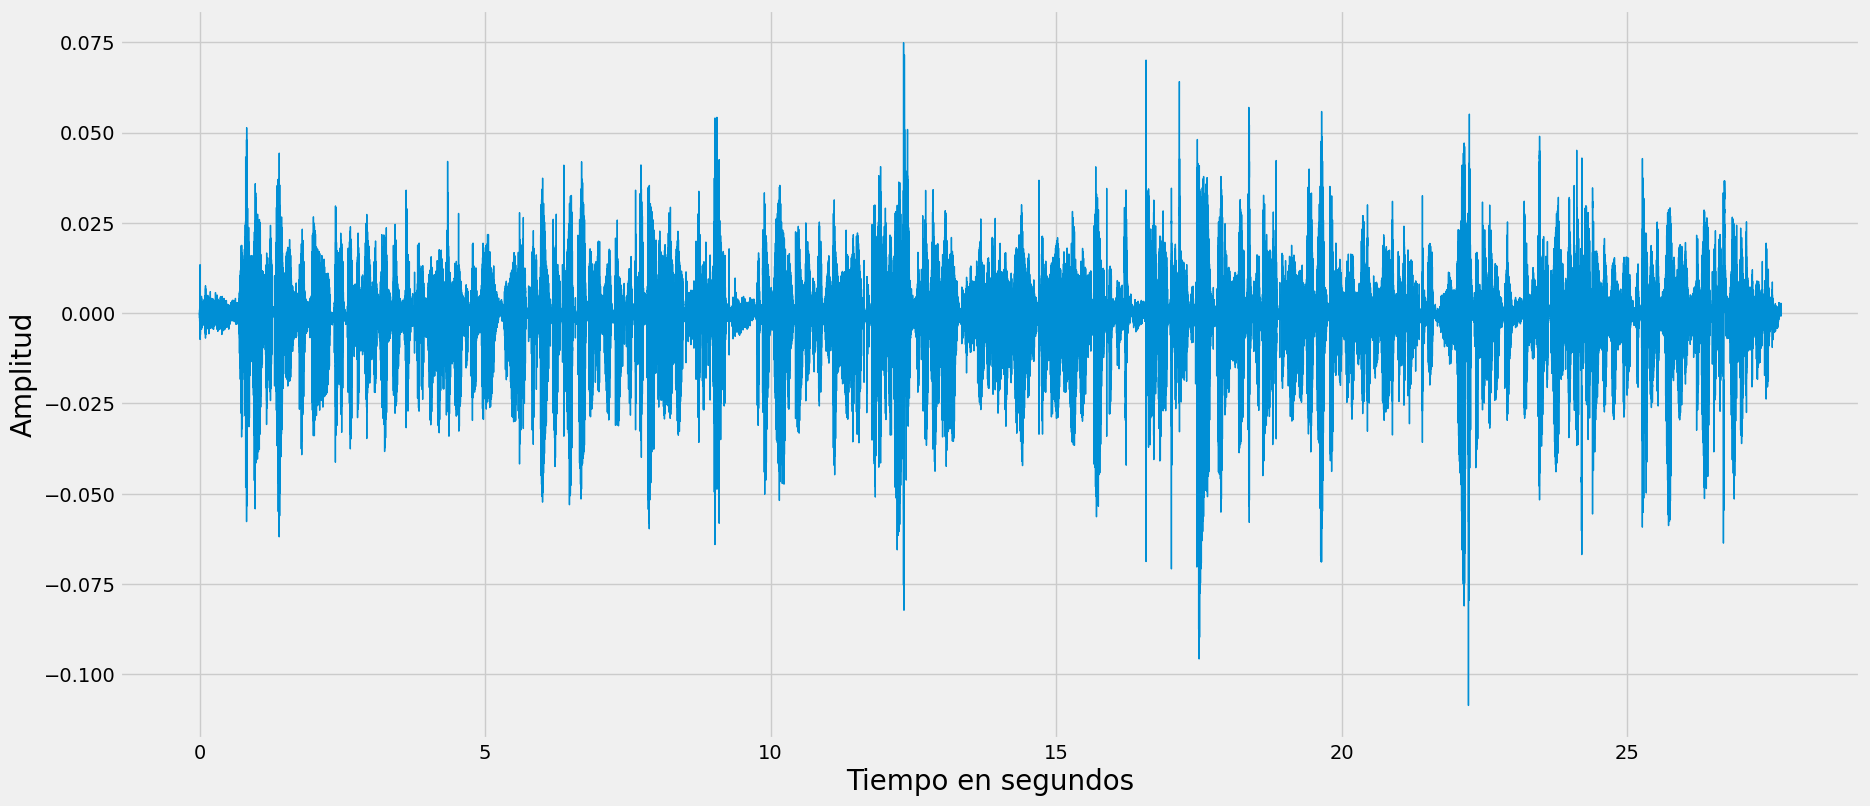

In [21]:
fig, ax = plt.subplots(figsize=(20, 9))
ax.set_xlabel('Tiempo en segundos', fontsize=20)
ax.set_ylabel('Amplitud', fontsize=20)
# plt.yticks(fontsize=12)
# plt.xticks(fontsize=17)
ax.plot([x /rate  for  x in range(cleanedAudio[cleanedAudio != 0].shape[0])], cleanedAudio[cleanedAudio != 0], lw=1)
plt.savefig("voiceFiltering/audioPreprocessingComplete.png")

In [ ]:
plt.plot(cleanedAudio[cleanedAudio != 0])

In [ ]:
IPython.display.Audio(data=cleanedAudio[cleanedAudio != 0] [44100:44100*3] , rate=rate)

## Detalles generales

Se realizará un script para automatizar el filtrado de las señales de audio.

El audio empleado como ejemplo es al parecer uno de los más complicados debido a la gran cantidad de ruido en él.